<a href="https://colab.research.google.com/github/VitalyGladyshev/gb_pytorch/blob/main/coursework/pytorch_coursework_glvv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курсовая работа Гладышев В.В.

## Подготовка данных

### Получение данных

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vitalygladyshev","key":"c7c46752ecdd4a7231c3ada3f19fbf37"}'}

In [ ]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Dec 25 06:25 .
drwx------ 1 root root 4096 Dec 25 05:49 ..
-rw------- 1 root root   71 Dec 25 06:25 kaggle.json


In [ ]:
!kaggle datasets list -s gesture

ref                                                     title                                                size  lastUpdated          downloadCount  
------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
gti-upm/leapgestrecog                                   Hand Gesture Recognition Database                     2GB  2018-07-30 06:43:29          10174  
kyr7plus/emg-4                                          Classify gestures by reading muscle activity.       868KB  2018-12-09 17:45:37           2534  
datamunge/sign-language-mnist                           Sign Language MNIST                                  63MB  2017-10-20 15:09:18          34799  
shayanriyaz/gesture-recognition                         Gesture Recognition                                   2MB  2020-02-25 18:12:57             74  
corrphilip/numeral-gestures                             Numeral Gestures recorded on iOS

In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog 
!ls

leapgestrecog.zip: Skipping, found more recently modified local copy (use --force to force download)
data  leapgestrecog  leapGestRecog  leapgestrecog.zip  sample_data


In [ ]:
from zipfile import ZipFile

In [ ]:
zip_file = ZipFile('leapgestrecog.zip')
zip_file.extractall()   # "./lyft-udacity-challenge")

In [ ]:
!ls

data  leapgestrecog  leapGestRecog  leapgestrecog.zip  sample_data


In [ ]:
path = "./leapGestRecog"

### Предобработка данных

In [ ]:
import os

In [ ]:
class_names = {}
file_counter = {}
file_img = {}

for root, dirs, files in os.walk(path):
    if dirs:
        if len(dirs[2]) > 3 and dirs[2][2] == '_':
            for dir in dirs:
                class_names[int(dir[:2])-1] = dir[3:]
                file_counter[int(dir[:2])-1] = 0
                file_img[int(dir[:2])-1] = []
            break

class_names

{0: 'palm',
 1: 'l',
 2: 'fist',
 3: 'fist_moved',
 4: 'thumb',
 5: 'index',
 6: 'ok',
 7: 'palm_moved',
 8: 'c',
 9: 'down'}

In [ ]:
file_counter

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [ ]:
file_img

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
!mkdir data/0
!mkdir data/1
!mkdir data/2
!mkdir data/3
!mkdir data/4
!mkdir data/5
!mkdir data/6
!mkdir data/7
!mkdir data/8
!mkdir data/9
!ls -la 

mkdir: cannot create directory ‘data/0’: File exists
mkdir: cannot create directory ‘data/1’: File exists
mkdir: cannot create directory ‘data/2’: File exists
mkdir: cannot create directory ‘data/3’: File exists
mkdir: cannot create directory ‘data/4’: File exists
mkdir: cannot create directory ‘data/5’: File exists
mkdir: cannot create directory ‘data/6’: File exists
mkdir: cannot create directory ‘data/7’: File exists
mkdir: cannot create directory ‘data/8’: File exists
mkdir: cannot create directory ‘data/9’: File exists
total 2232540
drwxr-xr-x  1 root root       4096 Dec 25 06:25 .
drwxr-xr-x  1 root root       4096 Dec 25 05:46 ..
drwxr-xr-x  1 root root       4096 Dec 21 17:29 .config
drwxr-xr-x 12 root root       4096 Dec 25 05:59 data
drwxr-xr-x  3 root root       4096 Dec 25 05:55 leapgestrecog
drwxr-xr-x 12 root root       4096 Dec 25 05:55 leapGestRecog
-rw-r--r--  1 root root 2286085038 Dec 25 05:55 leapgestrecog.zip
drwxr-xr-x  1 root root       4096 Dec 21 17:29 sample_d

In [ ]:
!ls -la data

total 108
drwxr-xr-x 12 root root  4096 Dec 25 05:59 .
drwxr-xr-x  1 root root  4096 Dec 25 06:25 ..
drwxr-xr-x  2 root root  4096 Dec 25 05:56 0
drwxr-xr-x  2 root root  4096 Dec 25 05:56 1
drwxr-xr-x  2 root root  4096 Dec 25 05:56 2
drwxr-xr-x  2 root root  4096 Dec 25 05:56 3
drwxr-xr-x  2 root root  4096 Dec 25 05:56 4
drwxr-xr-x  2 root root  4096 Dec 25 05:56 5
drwxr-xr-x  2 root root  4096 Dec 25 05:56 6
drwxr-xr-x  2 root root  4096 Dec 25 05:56 7
drwxr-xr-x  2 root root  4096 Dec 25 05:56 8
drwxr-xr-x  2 root root  4096 Dec 25 05:56 9
-rw-r--r--  1 root root 57729 Dec 25 05:59 frame_06_01_0195.png


In [ ]:
data_path = "data/"

In [ ]:
for root, dirs, files in os.walk(path):
    for fl in files:
        file_counter[int(fl[9:11])-1] += 1
        f = os.path.join(root, fl)
        file_img[int(fl[9:11])-1].append(f)
file_counter

{0: 2000,
 1: 2000,
 2: 2000,
 3: 2000,
 4: 2000,
 5: 2000,
 6: 2000,
 7: 2000,
 8: 2000,
 9: 2000}

In [ ]:
file_img[0][0]

'./leapGestRecog/06/01_palm/frame_06_01_0195.png'

In [ ]:
file_img[0][:5], file_img[0][-5:]

(['./leapGestRecog/06/01_palm/frame_06_01_0195.png',
  './leapGestRecog/06/01_palm/frame_06_01_0165.png',
  './leapGestRecog/06/01_palm/frame_06_01_0034.png',
  './leapGestRecog/06/01_palm/frame_06_01_0136.png',
  './leapGestRecog/06/01_palm/frame_06_01_0014.png'],
 ['./leapGestRecog/03/01_palm/frame_03_01_0035.png',
  './leapGestRecog/03/01_palm/frame_03_01_0009.png',
  './leapGestRecog/03/01_palm/frame_03_01_0089.png',
  './leapGestRecog/03/01_palm/frame_03_01_0057.png',
  './leapGestRecog/03/01_palm/frame_03_01_0097.png'])

In [ ]:
!cp ./leapGestRecog/06/01_palm/frame_06_01_0195.png data/

In [ ]:
!ls -la data

total 108
drwxr-xr-x 12 root root  4096 Dec 25 05:59 .
drwxr-xr-x  1 root root  4096 Dec 25 06:25 ..
drwxr-xr-x  2 root root  4096 Dec 25 05:56 0
drwxr-xr-x  2 root root  4096 Dec 25 05:56 1
drwxr-xr-x  2 root root  4096 Dec 25 05:56 2
drwxr-xr-x  2 root root  4096 Dec 25 05:56 3
drwxr-xr-x  2 root root  4096 Dec 25 05:56 4
drwxr-xr-x  2 root root  4096 Dec 25 05:56 5
drwxr-xr-x  2 root root  4096 Dec 25 05:56 6
drwxr-xr-x  2 root root  4096 Dec 25 05:56 7
drwxr-xr-x  2 root root  4096 Dec 25 05:56 8
drwxr-xr-x  2 root root  4096 Dec 25 05:56 9
-rw-r--r--  1 root root 57729 Dec 25 06:26 frame_06_01_0195.png


In [ ]:
pip install mediapipe

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# import scipy.misc

import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
# For webcam input:
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5)

(240, 640)


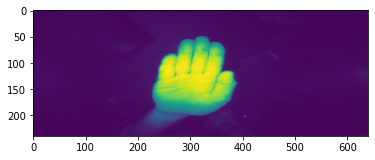

In [ ]:
img = Image.open(file_img[0][0])
print(np.asarray(img).shape)
plt.imshow(img)

In [ ]:
src = np.asarray(img)

In [ ]:
frame = cv2.cvtColor(src, cv2.COLOR_GRAY2RGB)

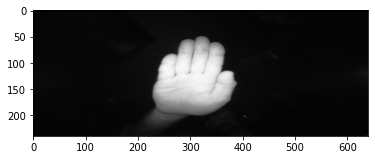

In [ ]:
plt.imshow(frame)

In [ ]:
arm_marks = ['WRIST',
             'THUMB_CMC', 'THUMB_MCP', 'THUMB_IP', 'THUMB_TIP',
             'INDEX_FINGER_MCP', 'INDEX_FINGER_PIP', 'INDEX_FINGER_DIP', 'INDEX_FINGER_TIP',
             'MIDDLE_FINGER_MCP', 'MIDDLE_FINGER_PIP', 'MIDDLE_FINGER_DIP', 'MIDDLE_FINGER_TIP',
             'RING_FINGER_MCP', 'RING_FINGER_PIP', 'RING_FINGER_DIP', 'RING_FINGER_TIP',
             'PINKY_MCP', 'PINKY_PIP', 'PINKY_DIP', 'PINKY_TIP']

In [ ]:
def hand_detection_mp(file_pth, prn=False):
    img = np.asarray(Image.open(file_pth))
    h, w = img.shape
    frame = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)   # cv2.flip(frame, 1)

    frame.flags.writeable = False
    # im_pil = Image.fromarray(frame)
    results = hands.process(frame)
    frame.flags.writeable = True

    if results.multi_hand_landmarks and prn:
        count = 0
        for hand_landmarks in results.multi_hand_landmarks:
            count += 1
            print(f"Рука {count}")
            print(
                f'\tIndex finger tip coordinates: ('
                f'x: {round(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * w)}, '
                f'y: {round(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * h)})'
            )
            for num, mark in enumerate(hand_landmarks.landmark):
                print(f"\tМетка {arm_marks[num]}"
                        f"- x: {round(mark.x * w)}, y: {round(mark.y * h)}")

    return results, frame

In [ ]:
hand_detect_rez, frame = hand_detection_mp(file_img[0][0], True)

Рука 1
	Index finger tip coordinates: (x: 353, y: 73)
	Метка WRIST- x: 274, y: 179
	Метка THUMB_CMC- x: 318, y: 187
	Метка THUMB_MCP- x: 349, y: 176
	Метка THUMB_IP- x: 367, y: 154
	Метка THUMB_TIP- x: 374, y: 129
	Метка INDEX_FINGER_MCP- x: 332, y: 136
	Метка INDEX_FINGER_PIP- x: 345, y: 108
	Метка INDEX_FINGER_DIP- x: 351, y: 91
	Метка INDEX_FINGER_TIP- x: 353, y: 73
	Метка MIDDLE_FINGER_MCP- x: 304, y: 132
	Метка MIDDLE_FINGER_PIP- x: 314, y: 103
	Метка MIDDLE_FINGER_DIP- x: 317, y: 81
	Метка MIDDLE_FINGER_TIP- x: 318, y: 59
	Метка RING_FINGER_MCP- x: 279, y: 135
	Метка RING_FINGER_PIP- x: 285, y: 110
	Метка RING_FINGER_DIP- x: 288, y: 89
	Метка RING_FINGER_TIP- x: 291, y: 68
	Метка PINKY_MCP- x: 256, y: 142
	Метка PINKY_PIP- x: 255, y: 123
	Метка PINKY_DIP- x: 252, y: 108
	Метка PINKY_TIP- x: 252, y: 94


In [ ]:
# Функция рисования прямоугольников рук
def draw_hand(frame, hand_landmarks):
    h, w, _ = frame.shape
    mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    max_x = max_y = 0
    min_x = min_y = 65535
    for mark in hand_landmarks.landmark:
        if mark.x > max_x:
            max_x = mark.x
        if mark.x < min_x:
            min_x = mark.x
        if mark.y > max_y:
            max_y = mark.y
        if mark.y < min_y:
            min_y = mark.y
    max_x = round(max_x * w) + 30
    min_x = round(min_x * w) - 30
    max_y = round(max_y * h) + 30
    min_y = round(min_y * h) - 30
    print(f"\tmax_x: {max_x} min_x: {min_x} max_y: {max_y} min_y: {min_y}")
    # Рисуем обрамляющий прямоугольник руки на кадре
    cv2.rectangle(frame,
                    (min_x, min_y),
                    (max_x, max_y),
                    (0, 255, 0),
                    thickness=2)
    return frame, [min_x, min_y, max_x, max_y]

	max_x: 404 min_x: 222 max_y: 217 min_y: 29


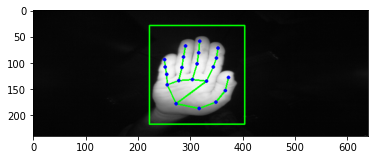

In [ ]:
if hand_detect_rez.multi_hand_landmarks:
    for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
        img, hand_box = draw_hand(frame, hand_landmarks)
        plt.imshow(img)
        break

In [261]:
# Возвращает изображение ладони
def get_hand(frame, hand_landmarks):
    h, w, _ = frame.shape
    max_x = max_y = 0
    min_x = min_y = 65535
    for mark in hand_landmarks.landmark:
        if mark.x > max_x:
            max_x = mark.x
        if mark.x < min_x:
            min_x = mark.x
        if mark.y > max_y:
            max_y = mark.y
        if mark.y < min_y:
            min_y = mark.y
    max_x = round(max_x * w) + 30
    min_x = round(min_x * w) - 30
    max_y = round(max_y * h) + 30
    min_y = round(min_y * h) - 30
    
    if min_x < 0:
        min_x = 0
    if min_y < 0:
        min_y = 0
    if max_x > w:
        max_x = w
    if max_y > h:
        max_y = h

    # print(f"\tmax_x: {max_x} min_x: {min_x} max_y: {max_y} min_y: {min_y}")
    
    res = frame[int(min_y):int(max_y), int(min_x):int(max_x)]
    res = cv2.resize(res, (160, 160), interpolation = cv2.INTER_AREA)
    return res

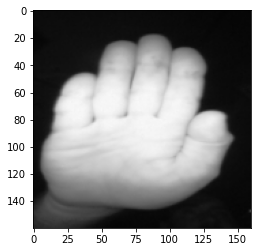

In [ ]:
hand_detect_rez, frame = hand_detection_mp(file_img[0][0])

if hand_detect_rez.multi_hand_landmarks:
    for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
        img = get_hand(frame, hand_landmarks)
        plt.imshow(img)
        break

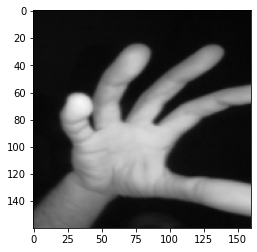

In [202]:
hand_detect_rez, frame = hand_detection_mp(file_img[9][0])

if hand_detect_rez.multi_hand_landmarks:
    for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
        img = get_hand(frame, hand_landmarks)
        plt.imshow(img)
        break

## Формирование датасета

In [206]:
for cn in range(10):
    file_counter[cn] = 0
file_counter

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [ ]:
pip install progressbar2

In [207]:
import tqdm

In [208]:
images_data = []
labels = []
images_for_vis = []

pbar = tqdm.tqdm(total=20000)
for cn in range(10):
    have_cn_inmg = False
    for img in file_img[cn]:
        hand_detect_rez, frame = hand_detection_mp(img)
        if hand_detect_rez.multi_hand_landmarks:
            file_counter[cn] += 1
            images_data.append(img)
            labels.append(cn)
            if not have_cn_inmg:
                images_for_vis.append(img)
                have_cn_inmg = True
        pbar.update(1)
pbar.close()
file_counter

100%|██████████| 20000/20000 [09:52<00:00, 33.78it/s]


{0: 1972,
 1: 1135,
 2: 1201,
 3: 1182,
 4: 1248,
 5: 1062,
 6: 1841,
 7: 801,
 8: 996,
 9: 1797}

In [209]:
len(images_data), len(labels)

(13235, 13235)

In [210]:
images_for_vis

['./leapGestRecog/06/01_palm/frame_06_01_0195.png',
 './leapGestRecog/06/02_l/frame_06_02_0191.png',
 './leapGestRecog/06/03_fist/frame_06_03_0174.png',
 './leapGestRecog/06/04_fist_moved/frame_06_04_0125.png',
 './leapGestRecog/06/05_thumb/frame_06_05_0012.png',
 './leapGestRecog/06/06_index/frame_06_06_0164.png',
 './leapGestRecog/06/07_ok/frame_06_07_0092.png',
 './leapGestRecog/06/08_palm_moved/frame_06_08_0138.png',
 './leapGestRecog/06/09_c/frame_06_09_0099.png',
 './leapGestRecog/06/10_down/frame_06_10_0028.png']

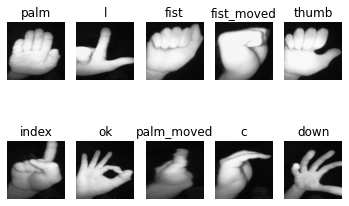

In [213]:
# plt.figure(figsize=(10,10))
for ind in range(10):
    ax = plt.subplot(2,5,ind+1)

    hand_detect_rez, frame = hand_detection_mp(images_for_vis[ind])
    if hand_detect_rez.multi_hand_landmarks:
        for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
            img = get_hand(frame, hand_landmarks)
            break

    plt.imshow(img)
    plt.title(class_names[ind])
    plt.axis('off')

In [214]:
labels[0], labels[-1]

(0, 9)

In [215]:
import pandas as pd

In [216]:
data = pd.DataFrame({'images': images_data, 'labels': labels})
data.reset_index(drop=True, inplace=True)
data.head()

,images,labels
0,./leapGestRecog/06/01_palm/frame_06_01_0195.png,0
1,./leapGestRecog/06/01_palm/frame_06_01_0165.png,0
2,./leapGestRecog/06/01_palm/frame_06_01_0034.png,0
3,./leapGestRecog/06/01_palm/frame_06_01_0136.png,0
4,./leapGestRecog/06/01_palm/frame_06_01_0014.png,0


In [217]:
data.tail()

,images,labels
13230,./leapGestRecog/03/10_down/frame_03_10_0014.png,9
13231,./leapGestRecog/03/10_down/frame_03_10_0198.png,9
13232,./leapGestRecog/03/10_down/frame_03_10_0032.png,9
13233,./leapGestRecog/03/10_down/frame_03_10_0091.png,9
13234,./leapGestRecog/03/10_down/frame_03_10_0029.png,9


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13235 entries, 0 to 13234
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  13235 non-null  object
 1   labels  13235 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 206.9+ KB


In [219]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.nn import functional as F

In [225]:
class CustomDatasetFromImages(Dataset):
    def __init__(self, data_info):
        # Подаем наш подготовленный датафрейм
        self.data_info = data_info
        
        self.image_arr = self.data_info.iloc[:,0]
        self.label_arr = self.data_info.iloc[:,1]
        
        # Количество пар картинка-сегментация
        self.data_len = len(self.data_info.index)

    def __getitem__(self, index):
        # Читаем картинку
        img = 0
        hand_detect_rez, frame = hand_detection_mp(self.image_arr[index])
        if hand_detect_rez.multi_hand_landmarks:
            for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
                img = get_hand(frame, hand_landmarks)
                break

        # размер 160х160
        # Нормализуем изображение в значениях [0,1]
        img = torch.FloatTensor(img)/255    
        # 1) unsqueeze - меняет размерность img c (160, 160, 1) -> (1, 160, 160, 1),
        # т.е. оборачивает картинку в батч размером в одну картинку
        # 2) permute - меняет местами измерения, т.е. (1, 160, 160, 1) -> (1, 1, 160, 160)
        img = img.unsqueeze(0).permute(0,3,1,2)
               
        return (img, self.label_arr[index])

    def __len__(self):
        return self.data_len

In [ ]:
from sklearn.model_selection import train_test_split

In [272]:
# 80 % в тренировочную выборку, 20 - в валидационную
X_train, X_valid = train_test_split(data, test_size=0.2)

# Упорядочиваем индексацию
X_train.reset_index(drop=True, inplace=True)
X_valid.reset_index(drop=True, inplace=True)

# Оборачиваем каждую выборку в наш кастомный датасет
train_data = CustomDatasetFromImages(X_train)   # [:300])
valid_data = CustomDatasetFromImages(X_valid)   # [:300])

In [273]:
batch_s = 64

train_data_loader = DataLoader(train_data, batch_size=batch_s, shuffle=True)
valid_data_loader = DataLoader(valid_data, batch_size=batch_s, shuffle=True)

In [277]:
data_iter = iter(valid_data_loader)
# [data_iter.next() for i in range(5)]

images, labels = data_iter.next()

images.shape, labels

(torch.Size([64, 1, 3, 160, 160]),
 tensor([2, 6, 5, 0, 5, 0, 2, 4, 6, 6, 9, 4, 9, 0, 4, 0, 9, 8, 0, 1, 9, 3, 5, 1,
         9, 4, 9, 5, 1, 3, 2, 1, 0, 0, 9, 8, 6, 6, 0, 8, 8, 9, 5, 5, 6, 4, 1, 3,
         9, 6, 6, 3, 0, 7, 0, 9, 1, 2, 4, 4, 6, 1, 4, 6]))

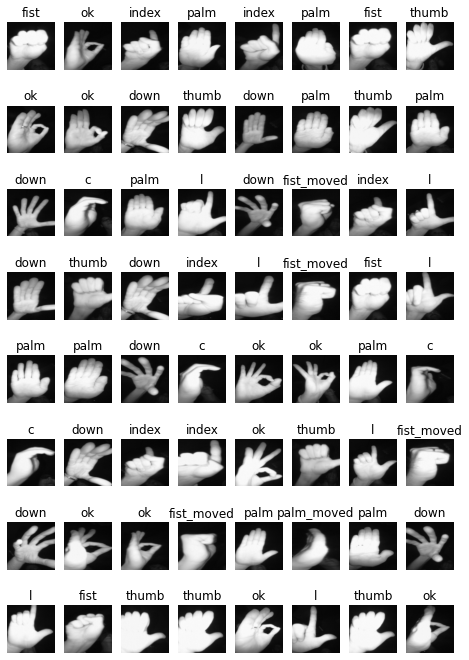

In [278]:
plt.figure(figsize=(8,12))
for ind in range(batch_s):
    ax = plt.subplot(8,8,ind+1)

    plt.imshow(images[ind, 0, :, :, :].permute(1, 2, 0).numpy())
    plt.title(class_names[int(labels[ind])])
    plt.axis('off')

## Базовая модель

In [223]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu
